In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tesla_data = yf.download("TSLA", start="2022-01-01", end="2024-05-31")
tesla_data = tesla_data.reset_index()
print(tesla_data.head())

/tmp/ipython-input-1312348742.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2022-01-01", end="2024-05-31")
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open     Volume
Ticker                   TSLA        TSLA        TSLA        TSLA       TSLA
0      2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
1      2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2      2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
3      2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
4      2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


In [3]:
tesla_data.head()


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
1,2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2,2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
3,2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
4,2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [4]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        605 non-null    datetime64[ns]
 1   (Close, TSLA)   605 non-null    float64       
 2   (High, TSLA)    605 non-null    float64       
 3   (Low, TSLA)     605 non-null    float64       
 4   (Open, TSLA)    605 non-null    float64       
 5   (Volume, TSLA)  605 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 28.5 KB


In [5]:
tesla_data.index

RangeIndex(start=0, stop=605, step=1)

In [6]:
tesla_data.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [7]:
tesla_data['roll'] = tesla_data['Close'].rolling(window=7).mean().values
tesla_data['roll']=tesla_data['roll'].ewm(alpha=0.2, adjust=False).mean()

In [8]:
tesla_data.head(10)

Price,Date,Close,High,Low,Open,Volume,roll
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,
0,2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400,NaN
1,2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300,NaN
2,2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800,NaN
3,2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600,NaN
4,2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700,NaN
5,2022-01-10,352.706665,353.033325,326.666656,333.333344,91815000,NaN
6,2022-01-11,354.799988,358.616669,346.273346,351.223328,66063300,364.365234
7,2022-01-12,368.739990,371.613342,357.529999,359.616669,83739000,363.474186
8,2022-01-13,343.853333,371.866669,342.179993,369.690002,97209900,361.637253


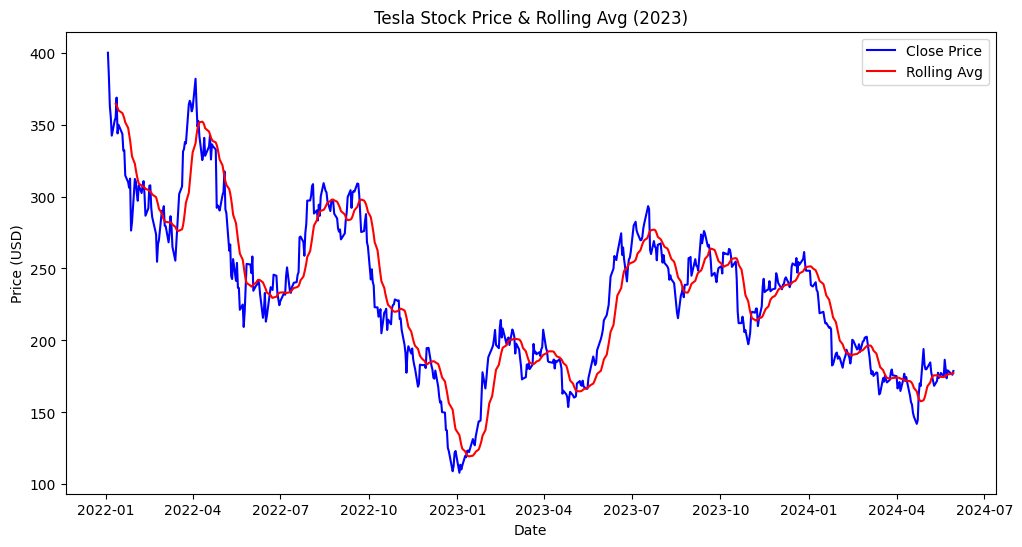

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Closing Price
plt.plot(tesla_data.Date, tesla_data['Close'], label='Close Price', color='blue')

# Plot Open Price
# plt.plot(tesla_data.index, tesla_data['Open'], label='Open Price', color='orange')

# Plot Rolling (smoothed) value
plt.plot(tesla_data.Date, tesla_data['roll'], label='Rolling Avg', color='red')

plt.title("Tesla Stock Price & Rolling Avg (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

plt.show()


In [42]:
df=tesla_data
df = df[['Date', 'Close','roll']]

df

Price,Date,Close,roll
Ticker,,TSLA,
0,2022-01-03,399.926666,NaN
1,2022-01-04,383.196655,NaN
2,2022-01-05,362.706665,NaN
3,2022-01-06,354.899994,NaN
4,2022-01-07,342.320007,NaN
...,...,...,...
600,2024-05-23,173.740005,175.951737
601,2024-05-24,179.240005,176.388247
602,2024-05-28,176.750000,176.792027


In [50]:
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import ks_2samp
import numpy as np

def stationarity_test(df, column_name):

  series = df[column_name].dropna()

  # --- ADF test (unit root test) ---
  adf_result = adfuller(series)
  print("ADF Statistic:", adf_result[0])
  print("ADF p-value:", adf_result[1])

  # --- KPSS test (stationarity test) ---
  kpss_result = kpss(series, regression='c')  # 'c' = constant, 'ct' = trend
  print("KPSS Statistic:", kpss_result[0])
  print("KPSS p-value:", kpss_result[1])

  # --- KS test (distribution shift check) ---
  split = len(series) // 2
  part1, part2 = series[:split], series[split:]

  ks_stat, ks_pval = ks_2samp(part1, part2)
  print("KS Statistic:", ks_stat)
  print("KS p-value:", ks_pval)

  if ks_pval < 0.05:
      print("❌ Distributions differ (suggests non-stationarity).")
  else:
      print("✅ Distributions similar (suggests strict stationarity).")

In [51]:
stationarity_test(df,'Close')

ADF Statistic: -2.580876138771261
ADF p-value: 0.09701454657416841
KPSS Statistic: 1.1557319374997674
KPSS p-value: 0.01
KS Statistic: [0.36142698]
KS p-value: [7.36012149e-18]
❌ Distributions differ (suggests non-stationarity).


/tmp/ipython-input-1691553912.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' = constant, 'ct' = trend


In [43]:


# First difference
x = df['Close'].diff()
df['1st_diff_close']=x

/tmp/ipython-input-2333497850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1st_diff_close']=x


In [47]:
df.dropna(inplace=True)

/tmp/ipython-input-1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [48]:
df

Price,Date,Close,roll,1st_diff_close
Ticker,,TSLA,,
6,2022-01-11,354.799988,364.365234,2.093323
7,2022-01-12,368.739990,363.474186,13.940002
8,2022-01-13,343.853333,361.637253,-24.886658
9,2022-01-14,349.869995,359.800945,6.016663
10,2022-01-18,343.503326,358.006279,-6.366669
...,...,...,...,...
600,2024-05-23,173.740005,175.951737,-6.369995
601,2024-05-24,179.240005,176.388247,5.500000
602,2024-05-28,176.750000,176.792027,-2.490005


In [52]:
stationarity_test(df,'1st_diff_close')

ADF Statistic: -6.905461627679968
ADF p-value: 1.250592651028677e-09
KPSS Statistic: 0.08852537006529643
KPSS p-value: 0.1
KS Statistic: 0.13726867335562987
KS p-value: 0.0063120194751563235
❌ Distributions differ (suggests non-stationarity).


/tmp/ipython-input-1691553912.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' = constant, 'ct' = trend


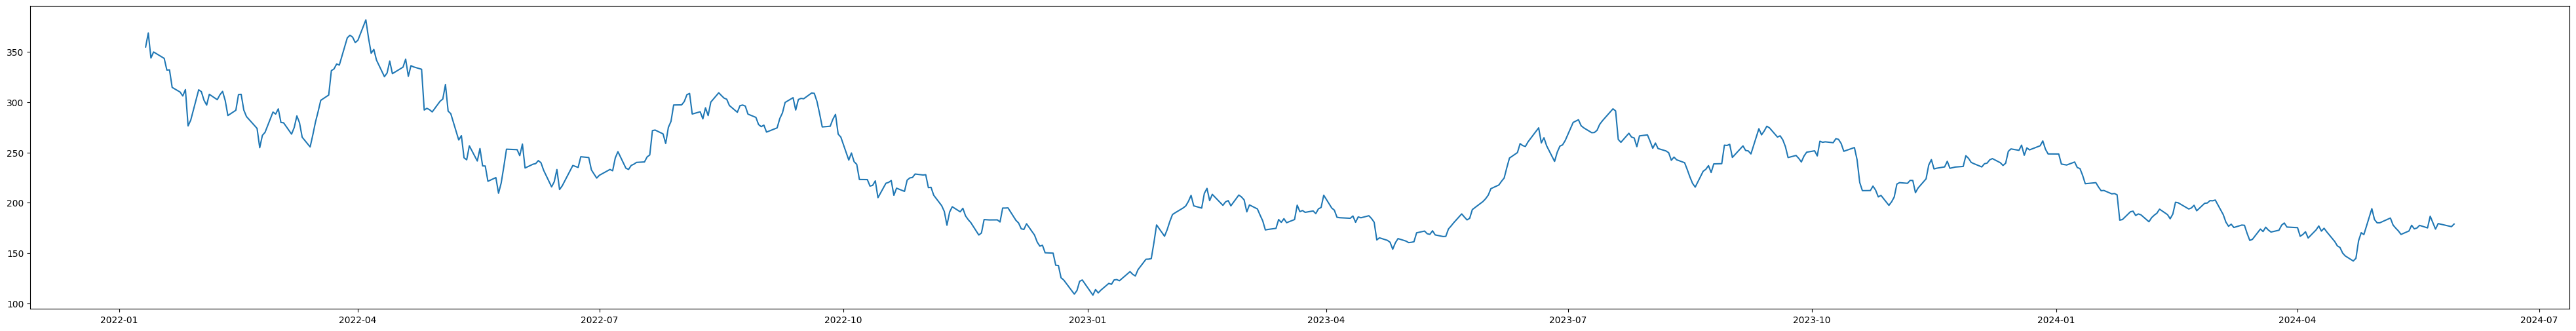

In [61]:
plt.figure(figsize=(50, 6))
plt.plot(df.index, df['Close'])

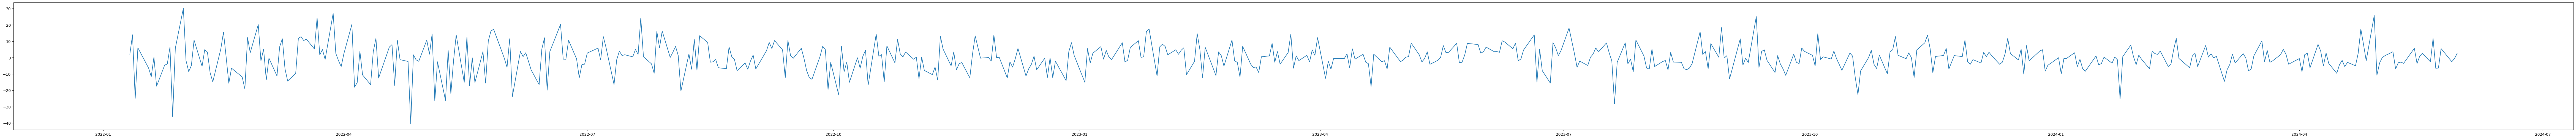

In [58]:
plt.figure(figsize=(120, 6))
plt.plot(df.index, df['1st_diff_close'])

In [16]:
import datetime
def str_to_datetime(date_str):
  year,month,day=date_str.split('-');
  return datetime.datetime(day=int(day), month=int(month), year=int(year))


In [63]:
from statsmodels.tsa.arima.model import ARIMA

series = df['1st_diff_close'].dropna()   # differenced Tesla prices

# AR(p)
model_ar = ARIMA(series, order=(2,0,0))   # p=2, q=0, d=0
res_ar = model_ar.fit()
print("AR Summary:\n", res_ar.summary())

# MA(q)
model_ma = ARIMA(series, order=(0,0,2))   # p=0, q=2
res_ma = model_ma.fit()
print("MA Summary:\n", res_ma.summary())

# ARMA(p,q)
model_arma = ARIMA(series, order=(2,0,2)) # ARMA(2,2)
res_arma = model_arma.fit()
print("ARMA Summary:\n", res_arma.summary())

# ARIMA(p,d,q) with differencing inside model
model_arima = ARIMA(df['Close'], order=(2,1,2)) # auto diff inside
res_arima = model_arima.fit()
print("ARIMA Summary:\n", res_arima.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR Summary:
                                SARIMAX Results                                
Dep. Variable:         1st_diff_close   No. Observations:                  599
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2141.192
Date:                Sat, 30 Aug 2025   AIC                           4290.385
Time:                        07:23:34   BIC                           4307.966
Sample:                             0   HQIC                          4297.229
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2903      0.357     -0.814      0.416      -0.989       0.409
ar.L1         -0.0374      0.046     -0.818      0.413      -0.127       0.052
ar.L2          0.0157      0.034      0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MA Summary:
                                SARIMAX Results                                
Dep. Variable:         1st_diff_close   No. Observations:                  599
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2141.221
Date:                Sat, 30 Aug 2025   AIC                           4290.441
Time:                        07:23:35   BIC                           4308.022
Sample:                             0   HQIC                          4297.286
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2903      0.355     -0.817      0.414      -0.987       0.406
ma.L1         -0.0370      0.046     -0.810      0.418      -0.126       0.053
ma.L2          0.0128      0.034      0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA Summary:
                                SARIMAX Results                                
Dep. Variable:         1st_diff_close   No. Observations:                  599
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2131.049
Date:                Sat, 30 Aug 2025   AIC                           4274.098
Time:                        07:23:42   BIC                           4300.470
Sample:                             0   HQIC                          4284.365
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2840      0.364     -0.780      0.435      -0.998       0.430
ar.L1         -1.5361      0.074    -20.690      0.000      -1.682      -1.391
ar.L2         -0.7921      0.071    -

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Summary:
                                SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                  599
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2128.028
Date:                Sat, 30 Aug 2025   AIC                           4266.055
Time:                        07:23:48   BIC                           4288.023
Sample:                             0   HQIC                          4274.608
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5435      0.073    -21.265      0.000      -1.686      -1.401
ar.L2         -0.7954      0.069    -11.499      0.000      -0.931      -0.660
ma.L1          1.5597      0.063    

In [65]:
# Get next 10 predicted values
forecast = res_ar.forecast(steps=10)
print(forecast)

599   -0.402631
600   -0.240709
601   -0.293868
602   -0.289339
603   -0.290343
604   -0.290234
605   -0.290254
606   -0.290251
607   -0.290252
608   -0.290252
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df








# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-03-25',
                                '2023-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-25,331.326660,333.036682,337.973328,[336.8800048828125]
1,2022-03-28,333.036682,337.973328,336.880005,[363.9466552734375]
2,2022-03-29,337.973328,336.880005,363.946655,[366.5233459472656]
3,2022-03-30,336.880005,363.946655,366.523346,[364.663330078125]
4,2022-03-31,363.946655,366.523346,364.663330,[359.20001220703125]
...,...,...,...,...,...
245,2023-03-17,183.259995,180.449997,184.130005,[180.1300048828125]
246,2023-03-20,180.449997,184.130005,180.130005,[183.25]
247,2023-03-21,184.130005,180.130005,183.250000,[197.5800018310547]
248,2023-03-22,180.130005,183.250000,197.580002,[191.14999389648438]


In [18]:
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-25,331.326660,333.036682,337.973328,[336.8800048828125]
1,2022-03-28,333.036682,337.973328,336.880005,[363.9466552734375]
2,2022-03-29,337.973328,336.880005,363.946655,[366.5233459472656]
3,2022-03-30,336.880005,363.946655,366.523346,[364.663330078125]
4,2022-03-31,363.946655,366.523346,364.663330,[359.20001220703125]
...,...,...,...,...,...
245,2023-03-17,183.259995,180.449997,184.130005,[180.1300048828125]
246,2023-03-20,180.449997,184.130005,180.130005,[183.25]
247,2023-03-21,184.130005,180.130005,183.250000,[197.5800018310547]
248,2023-03-22,180.130005,183.250000,197.580002,[191.14999389648438]


In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

/tmp/ipython-input-732508960.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dates, X.astype(np.float32), Y.astype(np.float32)


((250,), (250, 3, 1), (250,))

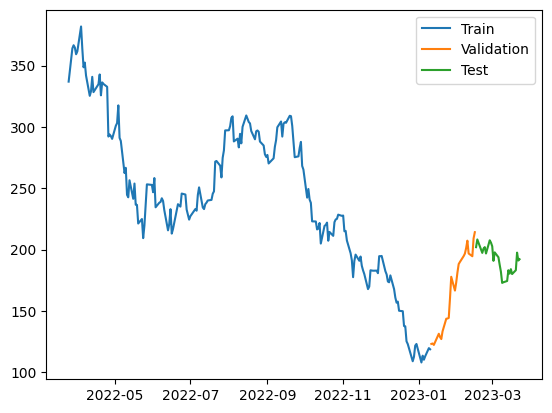

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 61778.8125 - mean_absolute_error: 241.4848 - val_loss: 28113.6367 - val_mean_absolute_error: 164.7455
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 63715.6523 - mean_absolute_error: 245.2734 - val_loss: 27701.3105 - val_mean_absolute_error: 163.4882
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 61789.6055 - mean_absolute_error: 241.7245 - val_loss: 27195.3477 - val_mean_absolute_error: 161.9344
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 61289.4844 - mean_absolute_error: 239.7865 - val_loss: 26579.7695 - val_mean_absolute_error: 160.0229
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 62787.7891 - mean_absolute_error: 242.7623 - val_loss: 25847.6055 - val_mean_absolute_error: 157.7121
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 62078.1953 - mean_absolute_error: 241.7214 - val_loss: 24918.7344 - val_mean_absolute_error: 154.7233
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


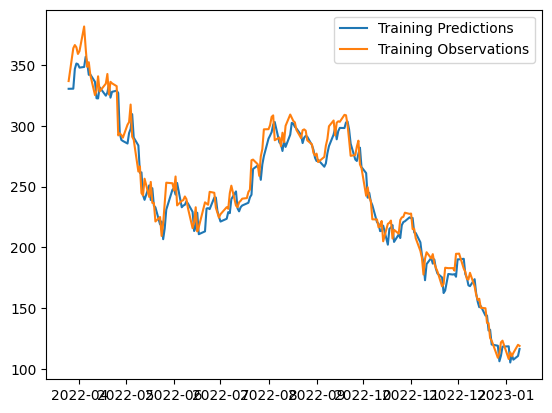

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


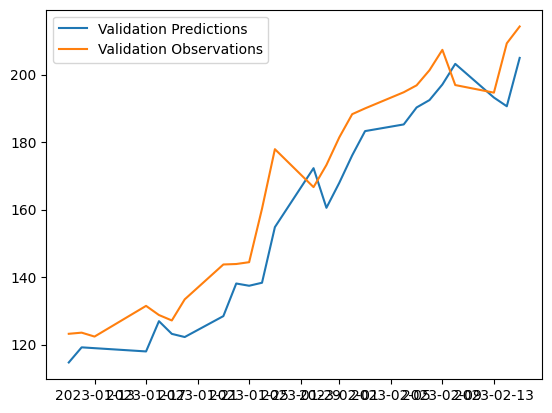

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


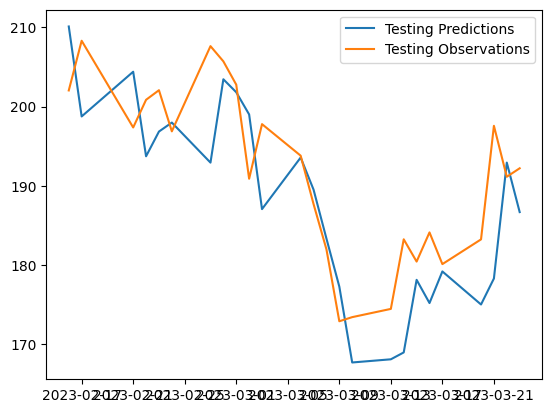

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

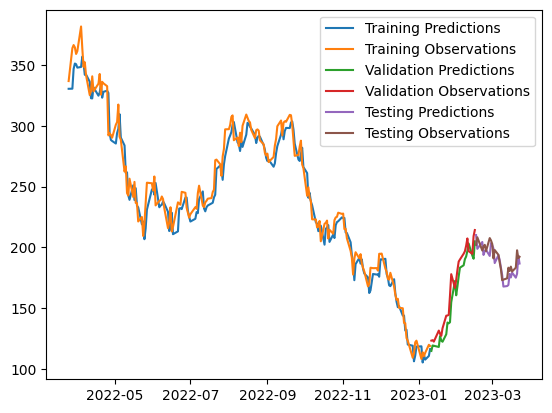

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [26]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

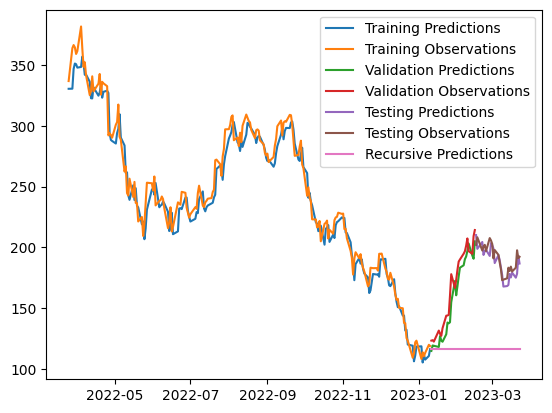

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])